For Each Depth

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [4]:
z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_z0avg = xr.open_dataset(z0avgpath)

In [1]:
%load_ext autoreload
%autoreload 2
import esm2m.myfunctions as mf

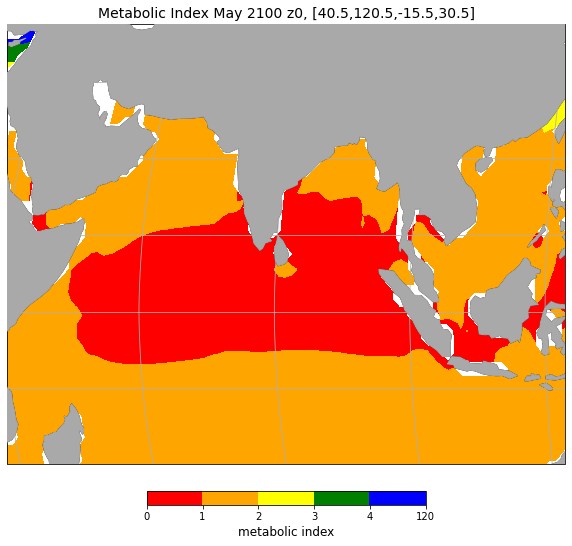

In [13]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
coords = [40.5,120.5,-15.5,30.5]
mf.graph(ds_z0avg, ax, 'Metabolic Index May 2100 z0, [40.5,120.5,-15.5,30.5]', '2100-05-16', coords, False)

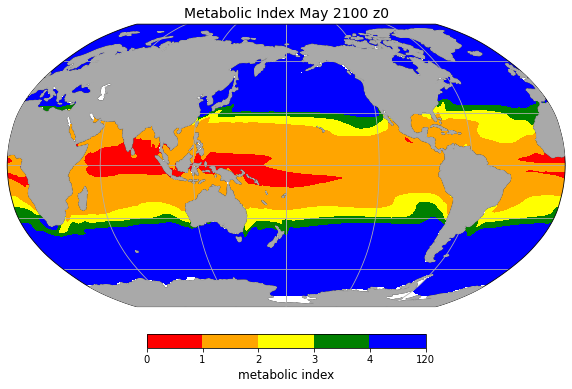

In [14]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
coords = [40.5,120.5,-15.5,30.5]
mf.graph(ds_z0avg, ax, 'Metabolic Index May 2100 z0', '2100-05-16', None, False)

In [17]:
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':ds_z0avg['xt_ocean'],'yt_ocean':ds_z0avg['yt_ocean']})

In [18]:
oceanmask = np.isfinite(ds_z0avg['MI'].isel(time=0).squeeze())
area_masked = area.where(oceanmask,np.nan)

In [19]:
ds_total = ~np.isnan(area.where(oceanmask))
total = ds_total.sum(dim='xt_ocean').sum(dim='yt_ocean')

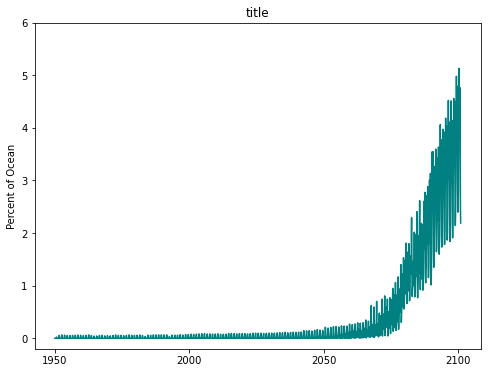

In [39]:
fig,ax = plt.subplots(figsize=(8,6))
mf.percent_plot(ds_z0avg, ax, 'title', True, False, False, None, None, 'k01', total)

In [22]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
percent_plot(ds_z0avg, ax, 'title', True, False, False, )

In [ ]:
ax.plot(np.unique(ds_yPercent['time']),ds_yPercent,color='cyan', label='MI < 3')

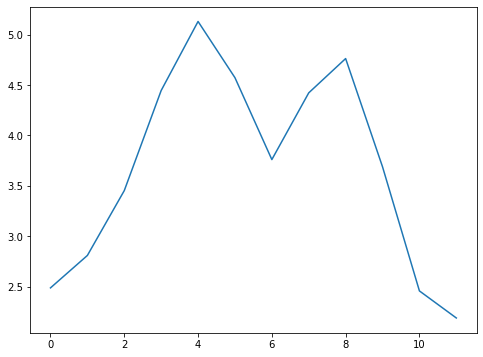

In [42]:
ds_2100 = ds_z0avg.sel(time=slice('2100-01-16','2100-12-16'))
fig,ax = plt.subplots(figsize=(8,6))
ds_red = ~np.isnan(ds_2100.where(ds_2100['MI']<1.0))
ds_rSum = ds_red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
ds_rPercent = (ds_rSum/total)*100
# ax.plot(np.unique(ds_rPercent['time.month']),ds_rPercent.groupby('time.month').mean(),color='coral')
ax.plot(ds_rPercent)

In [28]:
ds_rPercent

<xarray.DataArray (time: 1812)>
array([0.        , 0.        , 0.        , ..., 3.68896089, 2.45776441,
       2.18930803])
Coordinates:
  * time      (time) object 1950-01-16 12:00:00 ... 2100-12-16 12:00:00
    st_ocean  float64 5.0

In [21]:
def percent_plot(ds, plot, title, red, orange, yellow):
    if red:
        ds_red = ~np.isnan(ds.where(ds['MI']<1.0))
        ds_rSum = ds_red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
        ds_rPercent = (ds_rSum/total)*100
        plot.plot(ds_rPercent['time'],ds_rPercent,color='teal',label='MI < 1')
        
    if orange:
        ds_orange = ~np.isnan(ds.where(ds['MI']<2.0))
        ds_oSum = ds_orange['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
        ds_oPercent = (ds_oSum/total)*100
        plot.plot(np.unique(ds_oPercent['time.year']),ds_oPercent.groupby('time.year').mean(),color='dodgerblue',label='MI < 2')
    
    if yellow:
        ds_yellow = ~np.isnan(ds.where(ds['MI']<3.0))
        ds_ySum = ds_yellow['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
        ds_yPercent = (ds_ySum/total)*100
        plot.plot(np.unique(ds_yPercent['time.year']),ds_yPercent.groupby('time.year').mean(),color='cyan', label='MI < 3')        
        
    if red and yellow:
        plot.legend()
    elif orange and yellow:
        plot.set_ylim(14,40)
        plot.legend()
    elif red and orange:
        plot.set_ylim(-1,30)
        plot.legend()
        
    plot.set_title(title)
    plot.set_ylabel('Percent of Ocean')

In [67]:
def percent_by_year(ds, title, mi, plot):
    colortab = ['tab:blue','tab:orange','tab:green','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','pink','navy','darkgreen']
    years = np.arange(1990, 2110, 10)
    i = 0
    for year in years:
        ds_year = ds.sel(time=slice(str(year)+'-01-01',str(year)+'-12-31'))
        ds_red = ~np.isnan(ds_year.where(ds_year['MI']<mi))
        ds_rSum = ds_red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
        ds_rPercent = (ds_rSum/total)*100
        plot.plot(ds_rPercent,color=colortab[i],label=str(year))
        i += 1
    plot.legend()
    plot.set_title(title)

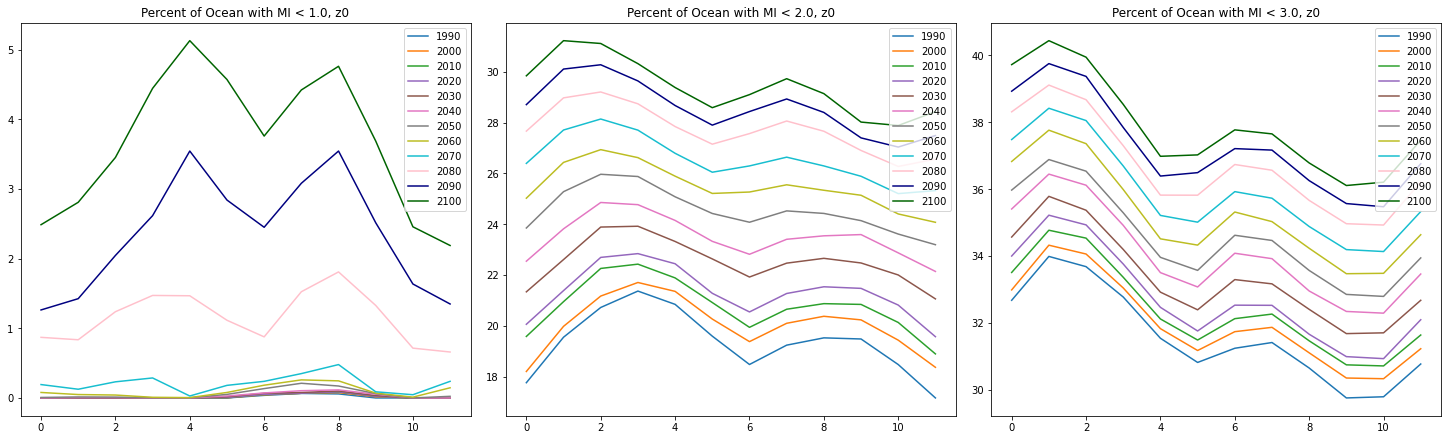

In [68]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
percent_by_year(ds_z0avg,'Percent of Ocean with MI < 1.0, z0', 1.0, ax0)
percent_by_year(ds_z0avg,'Percent of Ocean with MI < 2.0, z0', 2.0, ax1)
percent_by_year(ds_z0avg,'Percent of Ocean with MI < 3.0, z0', 3.0, ax2)

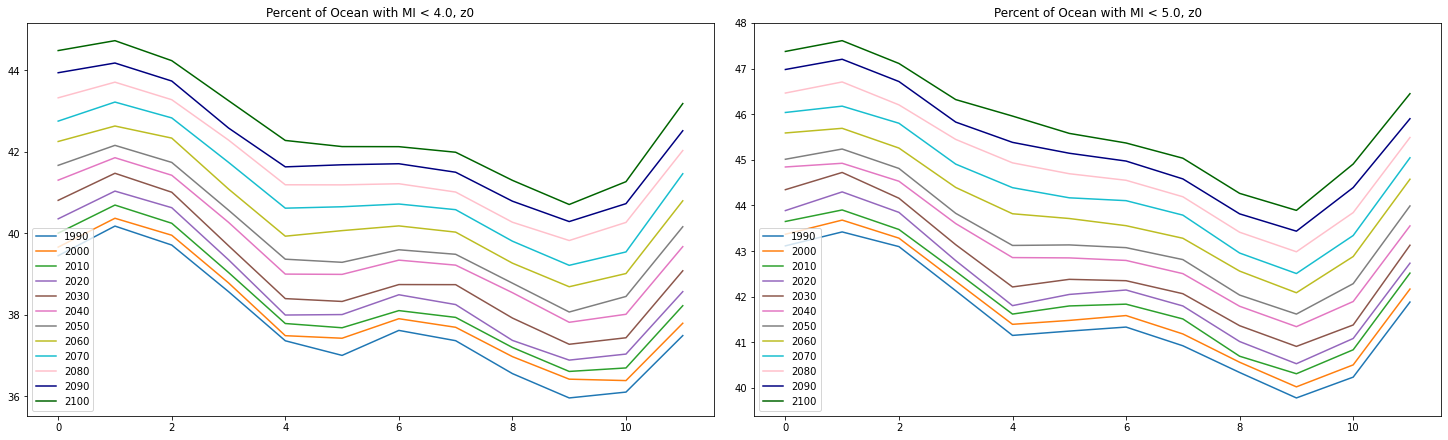

In [56]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,6),ncols=2,constrained_layout=True)
percent_by_year(ds_z0avg,'Percent of Ocean with MI < 4.0, z0', 4.0, ax0)
percent_by_year(ds_z0avg,'Percent of Ocean with MI < 5.0, z0', 5.0, ax1)

In [ ]:
def plot_year(ds, plot):
    colortab = ['tab:blue','tab:orange','tab:green','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','pink','navy','darkgreen']
    ds_red = ~np.isnan(ds.where(ds['MI']<1.0))
    ds_rSum = ds_red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    ds_rPercent = (ds_rSum/total)*100
    ax.plot(ds_rPercent,color=colortab[i],label=str(year))

In [ ]:
red_ens = ~np.isnan(ds_all.where(ds_all['MI']<1.0))
red_ens_sum = red_ens['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
percent_red_ens = (red_ens_sum/total)*100
ens = np.arange(0,30,1)